In [1]:
%pylab
%load_ext autoreload
%autoreload 2
%matplotlib inline
from conf_analysis.meg import tfr_analysis as ta
import seaborn as sns
import pandas as pd

Using matplotlib backend: TkAgg
Populating the interactive namespace from numpy and matplotlib


/home/nwilming/anaconda/lib/python2.7/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


Did not load wisdom cache


Is there a specific temporal relationship between contrast sample and gamma band power?
----------

In [2]:
cluster = {1: [3, 5], 
           2: [1, 2, 3, 4, 5, 6, 8, 9], 
           3: [3, 4, 8], 
           4: [5, 8], 
           5: [3, 6], 
           6: [2, 4, 6, 7],
           7: [2, 3, 7], 
           8: [1, 7, 8],
           9: [6,],
           10: [1, 3, 9, ], 
           11: [1,8,],
           12: [0, 1, 4],
           13: [1,], # Completely off 
           14: [1,],
           15: [8,]
          }
subjects = [1, 2, 3, 4, 5, 6, 7, 8, 9, 11, 13, 14, 15]

In [3]:
from joblib import Parallel, delayed

def get_sub(snum):
    try:
        df = ta.correlation_analysis(snum, cluster[snum], df=(-15, 5))
        df.loc[:, 'snum'] = snum
        return df
    except:
        return None

cc = Parallel(n_jobs=16)(delayed(get_sub)(i) for i in subjects)

In [4]:
corrs = pd.concat([c for c in cc[1:] if c is not None])

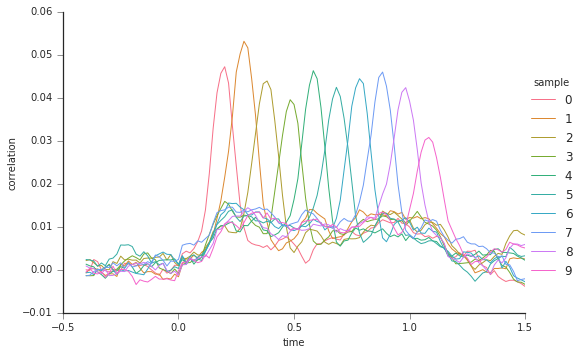

In [5]:
grid = sns.FacetGrid(corrs.groupby(['sample', 'time']).mean().reset_index(), 
                     hue="sample", size=5, aspect=1.5, legend_out=True)
grid = grid.map(plot, 'time', 'correlation')
grid.add_legend()
#savefig('/home/nwilming/conf_analysis/plots/correlation_contrast_gamma.pdf')

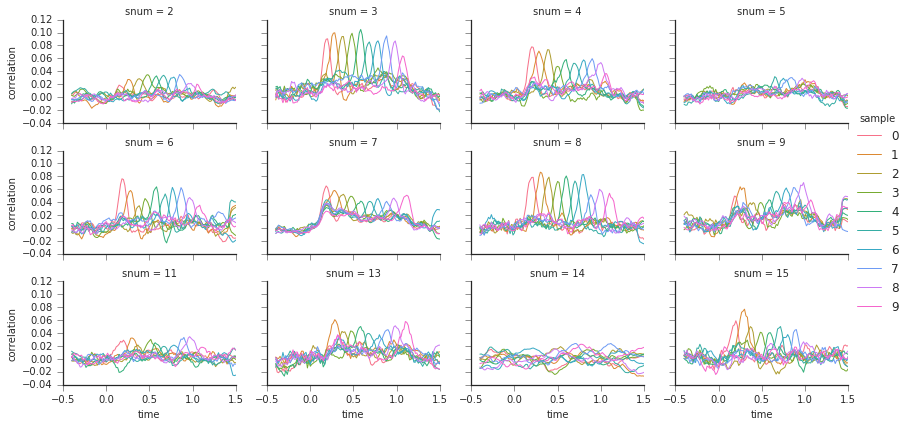

In [6]:
grid = sns.FacetGrid(corrs.groupby(['snum', 'sample', 'time']).mean().reset_index(), 
                     hue="sample", col='snum', col_wrap=4, size=2, aspect=1.5, legend_out=True)
grid = grid.map(plot, 'time', 'correlation')
grid.add_legend()

In [ ]:
from joblib import Parallel, delayed

def get_sub(snum, ii):
    df = ta.correlation_analysis(14, [[6, 7, 8, 9]], df=None, freq_limit=(snum-5, snum+5))
    df.loc[:, 'cluster'] = snum
    return df

icc = Parallel(n_jobs=10)(delayed(get_sub)(i, ii) for ii, i in enumerate(arange(30, 100, 5)))

________________________________________________________________________________
[Memory] Calling conf_analysis.meg.tfr_analysis.get_gamma_specific_data-alias...
get_gamma_specific_data-alias(14, None, [[6, 7, 8, 9]], freqs=(25, 35))________________________________________________________________________________
[Memory] Calling conf_analysis.meg.tfr_analysis.get_gamma_specific_data-alias...
get_gamma_specific_data-alias(14, None, [[6, 7, 8, 9]], freqs=(60, 70))________________________________________________________________________________
[Memory] Calling conf_analysis.meg.tfr_analysis.get_gamma_specific_data-alias...
get_gamma_specific_data-alias(14, None, [[6, 7, 8, 9]], freqs=(45, 55))________________________________________________________________________________
[Memory] Calling conf_analysis.meg.tfr_analysis.get_gamma_specific_data-alias...
get_gamma_specific_data-alias(14, None, [[6, 7, 8, 9]], freqs=(30, 40))____________________________________________________________________

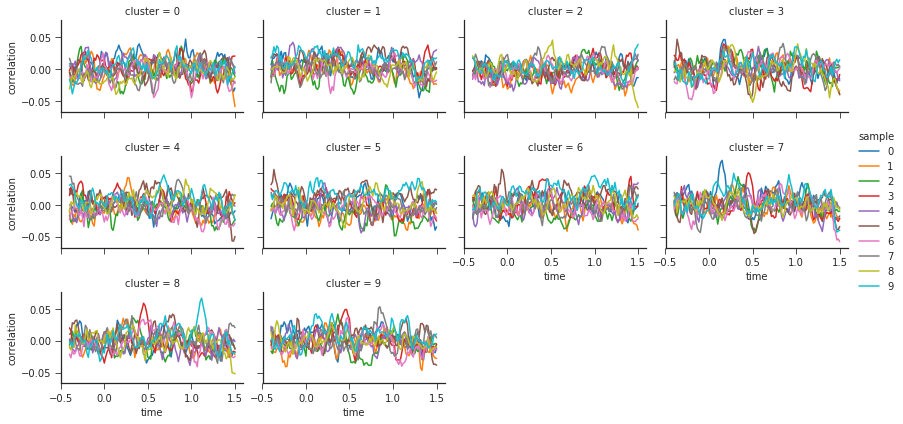

In [8]:
icorrs = pd.concat(icc)
grid = sns.FacetGrid(icorrs.groupby(['cluster', 'sample', 'time']).mean().reset_index(), 
                     hue="sample", col='cluster', col_wrap=4, size=2, aspect=1.5, legend_out=True)
grid = grid.map(plot, 'time', 'correlation')
grid.add_legend()

In [ ]:
avg, meta = ta.get_subject(6, (5, 100), ta.sensors['occipital'], -0.4, 1.2)

In [ ]:
meta.shape

In [ ]:
l = ta.avg_baseline(avg).groupby(level=['freq']).mean()
idt = (-0.4 < l.columns.values) & (l.columns.values<0)
pcolormesh(l.columns, l.index, l.values)
colorbar()

In [ ]:
t = cc[0].query('sample==0').set_index('time')
t.correlation.loc[0.4:0.5]

snum
1     Axes(0.125,0.125;0.775x0.775)
2     Axes(0.125,0.125;0.775x0.775)
3     Axes(0.125,0.125;0.775x0.775)
4     Axes(0.125,0.125;0.775x0.775)
5     Axes(0.125,0.125;0.775x0.775)
6     Axes(0.125,0.125;0.775x0.775)
7     Axes(0.125,0.125;0.775x0.775)
8     Axes(0.125,0.125;0.775x0.775)
9     Axes(0.125,0.125;0.775x0.775)
11    Axes(0.125,0.125;0.775x0.775)
13    Axes(0.125,0.125;0.775x0.775)
14    Axes(0.125,0.125;0.775x0.775)
15    Axes(0.125,0.125;0.775x0.775)
dtype: object

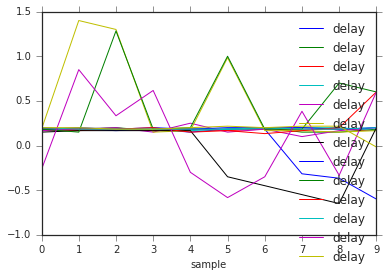

In [7]:
# Now extract times of peak amplitude per sample and subject
def get_peak(corr):
    '''
    Corr is per subject and sample correlation matrix
    '''
    cs_onset = corr.loc[:, 'sample'].values[0]*0.1
    corr = corr.set_index('time')
    corr.loc[cs_onset+0.1:cs_onset+0.25]
    return pd.DataFrame({'delay':corr.correlation.argmax()-cs_onset, 'amplitude':corr.correlation.max()}, index=[0])
    
peaks = corrs.groupby(['snum', 'sample']).apply(get_peak)

figure()
peaks.reset_index().groupby('snum').plot('sample', 'delay', ax=gca())

In [ ]:
yrs = ta.get_contrast_vs_power(cluster=cluster)

________________________________________________________________________________
[Memory] Calling conf_analysis.meg.tfr_analysis.get_gamma_specific_data-alias...
get_gamma_specific_data-alias(1, (-10, 40), [3, 5], baseline=<function avg_baseline at 0x7f8bfdc07de8>)


/mnt/homes/home024/nwilming/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: PerformanceWarning: indexing past lexsort depth may impact performance.
  if __name__ == '__main__':


___________________________________get_gamma_specific_data-alias - 42.3s, 0.7min
________________________________________________________________________________
[Memory] Calling conf_analysis.meg.tfr_analysis.get_gamma_specific_data-alias...
get_gamma_specific_data-alias(2, (-10, 40), [4, 6, 9], baseline=<function avg_baseline at 0x7f8bfdc07de8>)


In [ ]:
sns.lmplot(x='contrast', y='power', hue='time', col='snum', col_wrap=4, data=yrs.reset_index(), ci=None)